In [6]:
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
     

%matplotlib inline

In [7]:
base_dir = "data/training-set/GTSRB/Final_Training/Images/"
            
def partial_data():
    for cls_string in os.listdir(base_dir):
        csv_path = base_dir + "/{0}/GT-{0}.csv".format(cls_string)
        
        df = pd.read_csv(csv_path, sep=";")
        df['Filename'] = base_dir + cls_string + "/" + df['Filename']
        
        yield df

print("Cargando datos, esto puede tardar unos minutos...")
data = pd.concat(partial_data())
data["Image"] = data.Filename.apply(imread)
print("Carga completa!")

Cargando datos, esto puede tardar unos minutos...
Carga completa!


In [8]:
data.sample(n=5)

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Image
1778,data/training-set/GTSRB/Final_Training/Images/...,93,85,8,7,85,78,13,"[[[255, 254, 255], [255, 255, 255], [255, 255,..."
361,data/training-set/GTSRB/Final_Training/Images/...,32,32,6,6,27,27,30,"[[[137, 144, 154], [137, 147, 159], [131, 143,..."
1382,data/training-set/GTSRB/Final_Training/Images/...,31,32,5,5,26,27,12,"[[[241, 236, 216], [255, 229, 214], [217, 171,..."
374,data/training-set/GTSRB/Final_Training/Images/...,38,39,5,6,33,34,3,"[[[255, 255, 253], [255, 255, 255], [255, 255,..."
1185,data/training-set/GTSRB/Final_Training/Images/...,45,42,5,6,40,37,25,"[[[251, 255, 255], [254, 255, 255], [255, 255,..."


class: 5, shape: (32, 32, 3)


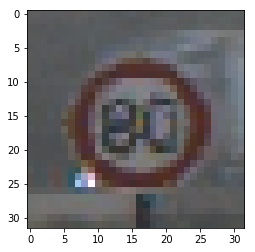

class: 11, shape: (32, 32, 3)


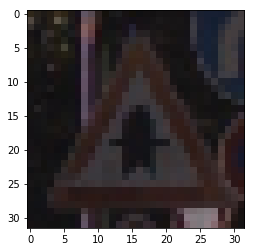

class: 8, shape: (32, 32, 3)


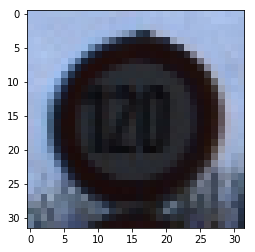

class: 2, shape: (32, 32, 3)


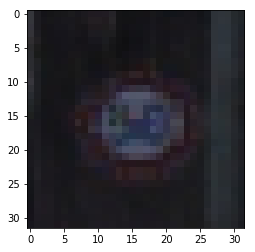

class: 26, shape: (32, 32, 3)


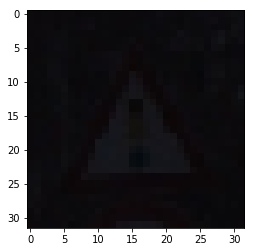

class: 25, shape: (32, 32, 3)


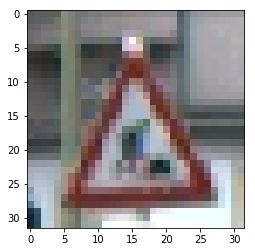

class: 28, shape: (32, 32, 3)


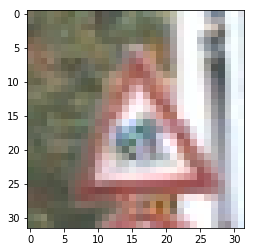

class: 35, shape: (32, 32, 3)


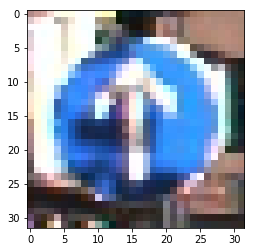

class: 14, shape: (32, 32, 3)


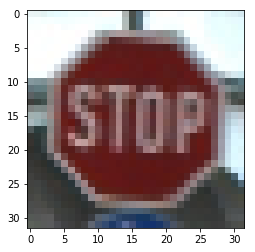

class: 1, shape: (32, 32, 3)


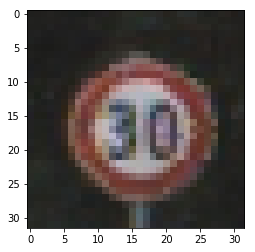

In [9]:
batch = data.sample(10)

for i, row in batch.iterrows():
    img = row.Image
    print("class: {}, shape: {}".format(row.ClassId, img.shape))
    plt.imshow(img)
    plt.show()

In [11]:
features = np.stack(data.Image.as_matrix())
labels = np.stack(data.ClassId.as_matrix())

print("Features shape: {} \nLabels shape: {}".format(features.shape, labels.shape))

Features shape: (39209, 32, 32, 3) 
Labels shape: (39209,)
